In [1]:
import pandas as pd 

housingData = pd.read_csv('HousingData.csv')
print(housingData.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [2]:
'''Prior to analysis, preprocess the dataset. Handle missing values, outliers,
and consider necessary transformations to ensure data quality and suitability for analysis.'''

# Check for missing values
print(housingData.isnull().sum()) 

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [3]:

# missing values of all columns replaced with mean of the column
from sklearn.impute import SimpleImputer
housing = housingData.copy()

imputer = SimpleImputer(strategy='mean')
housing = imputer.fit_transform(housing)
housing = pd.DataFrame(housing, columns=housingData.columns)




In [4]:
# remove outliers

housing.drop('CHAS', axis=1, inplace=True)
# size of the dataset before removing outliers
print(housing.shape)

(506, 13)


In [5]:

# Check for outliers iqr 
Q1 = housing.quantile(0.25)
Q3 = housing.quantile(0.75)
print(Q1)
print(Q1.shape)

print(type(Q1))
IQR = Q3 - Q1
print(IQR)




CRIM         0.083235
ZN           0.000000
INDUS        5.190000
NOX          0.449000
RM           5.885500
AGE         45.925000
DIS          2.100175
RAD          4.000000
TAX        279.000000
PTRATIO     17.400000
B          375.377500
LSTAT        7.230000
MEDV        17.025000
Name: 0.25, dtype: float64
(13,)
<class 'pandas.core.series.Series'>
CRIM         3.528639
ZN          11.211934
INDUS       12.910000
NOX          0.175000
RM           0.738000
AGE         47.650000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT        9.340000
MEDV         7.975000
dtype: float64


In [6]:
min_threshold = Q1 - 1.5 * IQR
max_threshold = Q3 + 1.5 * IQR

print(min_threshold)
print(max_threshold)


CRIM        -5.209723
ZN         -16.817901
INDUS      -14.175000
NOX          0.186500
RM           4.778500
AGE        -25.550000
DIS         -2.532200
RAD        -26.000000
TAX       -301.500000
PTRATIO     13.200000
B          344.106250
LSTAT       -6.780000
MEDV         5.062500
dtype: float64
CRIM          8.904832
ZN           28.029835
INDUS        37.465000
NOX           0.886500
RM            7.730500
AGE         165.050000
DIS           9.820800
RAD          54.000000
TAX        1246.500000
PTRATIO      24.400000
B           427.496250
LSTAT        30.580000
MEDV         36.962500
dtype: float64


In [7]:

outliers = (housing < (Q1 - 1.5 * IQR)) | (housing > (Q3 + 1.5 * IQR))

print(outliers.sum())


CRIM       64
ZN         68
INDUS       0
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT      12
MEDV       40
dtype: int64


In [8]:


outliers = (housing < (Q1 - 1.5 * IQR)) | (housing > (Q3 + 1.5 * IQR))

print(outliers.sum())

# replace outliers with the median of the column
housing = housing.mask(outliers, housing.median(), axis=1)


# size of the dataset after removing outliers
print(housing.shape)

print(housing.head())

CRIM       64
ZN         68
INDUS       0
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT      12
MEDV       40
dtype: int64
(506, 13)
      CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler(feature_range=(0, 5))

# Fit and transform the data
housing_scaled = scaler.fit_transform(housing)

# Convert back to a dataframe
housing_scaled = pd.DataFrame(housing_scaled, columns=housing.columns)

print(housing_scaled.head())


       CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0  0.000000  3.214286  0.339076  1.574074  3.014941  3.208033  1.828920   
1  0.011945  0.000000  1.211510  0.864198  2.741017  3.913491  2.370788   
2  0.011934  0.000000  1.211510  0.864198  4.099964  2.996910  2.370788   
3  0.014825  0.000000  0.315249  0.751029  3.767343  2.209063  3.047335   
4  0.035700  0.000000  0.315249  0.751029  4.032373  2.641607  3.047335   

        RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.000000  1.040076  1.011905  5.000000  0.575425  2.977346  
1  0.217391  0.524809  2.500000  5.000000  1.311969  2.588997  
2  0.217391  0.524809  2.500000  4.608579  0.407224  4.708738  
3  0.434783  0.333969  3.035714  4.781689  0.214235  4.498382  
4  0.434783  0.333969  3.035714  5.000000  1.945013  4.951456  


In [10]:
'''3. Statistical Model Application: Apply linear regression to predict the median value of owner-
occupied homes using the preprocessed dataset. Split the data into 80% training set and 20% test
set. Calculate the mean squared error (MSE) on the test set to evaluate model performance.
Determine and display the y-intercept and slope of the best-fitted line.
.'''

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



X = housing_scaled.drop('MEDV', axis=1)
y = housing_scaled['MEDV']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

print('Intercept:', model.intercept_)
print('Slope:', model.coef_)






(404, 12)
(102, 12)
Mean Squared Error: 0.3272427412739307
Intercept: 3.5515238865982486
Slope: [ 0.10091531 -0.00532415 -0.06545641 -0.07495721  0.31423903 -0.07678951
 -0.09120832 -0.03883125 -0.14340837 -0.09224907 -0.0235436  -0.26407127]


In [11]:
# print the actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.count())

Actual       102
Predicted    102
dtype: int64


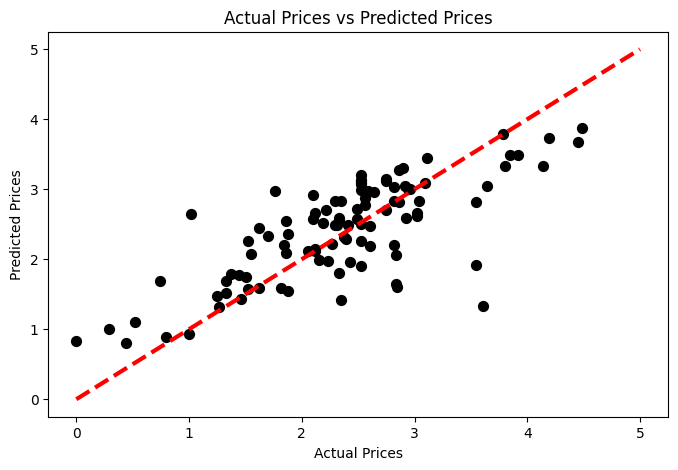

In [13]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.scatter(y_test, y_pred, s=50, color='black')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

plt.plot([0,5],[0,5] ,color='red', label='Regression line', linewidth=3, linestyle='--')

plt.show()